# 各種迴歸模型實作與調整

## 匯入套件與資料

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family']='DFKai-SB' #正常顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

df = pd.read_csv('tw_house.csv', encoding='big5') #台北市房屋資料
df.head(5) #取前5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,...,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738,1,1,1,0.00,0,23,...,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853,1,1,1,0.00,0,21,...,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815,3,2,2,12.96,0,9,...,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046,3,2,1,34.60,0,9,...,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216,5,2,2,51.07,0,13,...,0,1,0,0,0,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split

X = df[['建物移轉總面積平方公尺']]
y = df[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
252,46.87
451,26.58
61,99.49
333,130.49
115,362.35


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [6]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)

In [7]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim) #座標軸區間限制
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## K最近鄰迴歸

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=4,weights='uniform')
# weight='uniform'表示最近n個資料點的貢獻權重相同
# weight='distance'表示最近n個資料點的貢獻權重依照距離加權
knnr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((knnr.predict(X_test_std) - y_test) ** 2))
print("R Square:",knnr.score(X_test_std, y_test))

MSE: 5675349.78
R Square: 0.606821304583


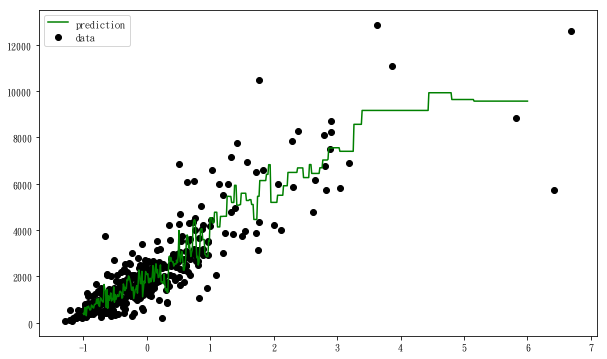

In [16]:
T = np.linspace(-1, 6, 600).reshape(-1,1) #reshape成二維矩陣 填入-1為模糊計算,reshape(-1,1)意思為不確定行數 但是變成一列

plt.figure(figsize=(10,6))
plt.scatter(X_train_std, y_train['總價元'], c='k', label='data')
plt.plot(T, knnr.predict(T), c='g', label='prediction')
plt.legend()
plt.show()

## 窮舉最適K值

best_k: 5
best_scoer: 0.626797073532


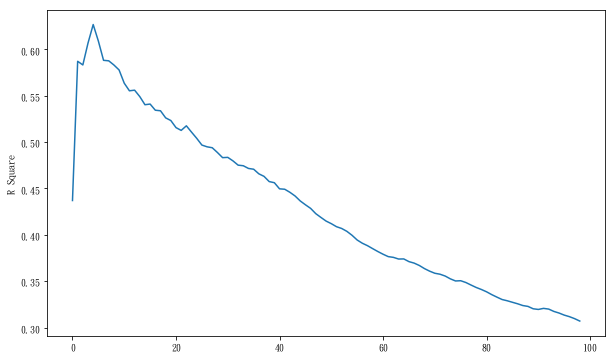

In [31]:
score_list=[]
for i in range(1,100):
    knnr = KNeighborsRegressor(n_neighbors=i)
    knnr.fit(X_train_std, y_train)
    score_list.append(knnr.score(X_test_std, y_test))

print('best_k:',score_list.index(np.max(score_list))+1) # +1修正index位置以及實際數量
print('best_scoer:',np.max(score_list))
plt.figure(figsize=(10,6))
plt.ylabel('R Square')
plt.plot(score_list)

## 調整模型(提高維度)

In [38]:
X = df[['建物移轉總面積平方公尺',"建築完成年"]]
y = df[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,建築完成年
551,66.51,104
18,65.52,75
97,183.26,83
79,26.96,67
288,93.17,59


In [39]:
#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [40]:
knnr = KNeighborsRegressor(n_neighbors=4,weights='uniform')
knnr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((knnr.predict(X_test_std) - y_test) ** 2))
print("R Square:",knnr.score(X_test_std, y_test))

MSE: 4844771.01
R Square: 0.615922180991


In [51]:
#找尋坐標軸範圍
print(X_train_std[:,0].max())
print(X_train_std[:,0].min())
print(X_train_std[:,1].max())
print(X_train_std[:,1].min())

5.94388383106
-1.22131909243
1.54463514733
-2.18306417003


In [115]:
#找尋最適K值
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-1.5, 6, 600)
y = np.linspace(-2.5, 2, 600) #建立座標軸

X, Y= np.meshgrid(x,y) 

In [142]:
X_axis = X.reshape(600*600,1)
Y_axis = Y.reshape(600*600,1)
axis_data = np.concatenate((X_axis,Y_axis),axis = 1)
axis_data.shape

(360000, 2)

In [147]:
Z = knnr.predict(axis_data)

In [149]:
Z = Z.reshape(600,600)

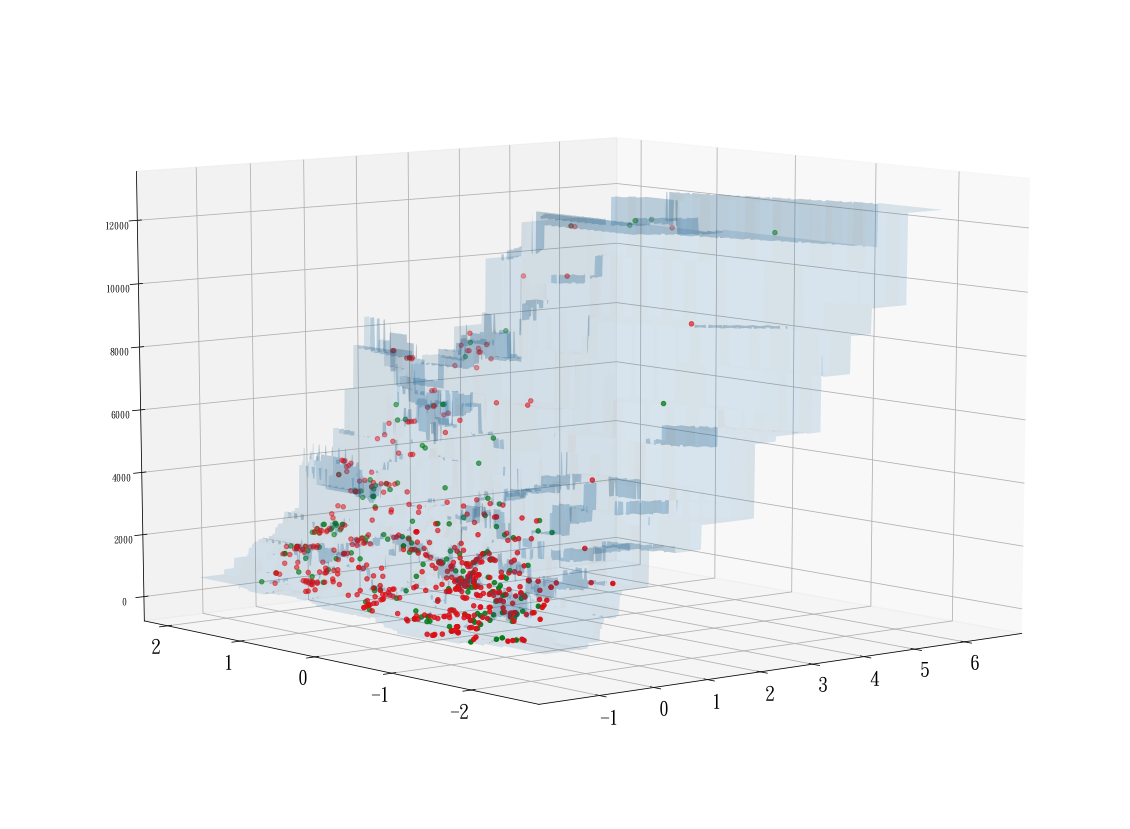

In [181]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection = "3d")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.scatter(X_train_std[:,0],X_train_std[:,1],knnr.predict(X_train_std),c = "r")
ax.scatter(X_test_std[:,0],X_test_std[:,1],knnr.predict(X_test_std),c = "g")
ax.plot_surface(X,Y,Z,alpha = 0.15)
ax.view_init(10,-130)